In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import shutil
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# mixxing fake and real dataset
from Dataset_Folder import copyfolder
fake = 'D:\Deep_Fake\DataSet\Train\Fake'
real = 'D:\Deep_Fake\DataSet\Train\Real'
new =  'D:\Deep_Fake\DataSet\Train_Mix'


In [3]:
# copyfolder(fake, real, new)

from fake_real_count import count_file
fake_img,real_img= count_file(new)
print('Fake Images : ', fake_img)
print('real Images : ', real_img)

Fake Images :  70001
real Images :  70001


In [4]:
from Set_Labels import set_label
labels = set_label(new)
print(len(labels))

140002


In [5]:
path = 'D:/Deep_Fake/DataSet/Train_Mix/'
files = os.listdir('D:/Deep_Fake/DataSet/Train_Mix')
fake_real_img = []
labels2 = []
cnt =0


for file in files :
    cnt += 1
    if cnt%100==0:
        labels2.append(labels[cnt])
        name = path+file
        img = Image.open(name)
        img = np.array(img)
        fake_real_img.append(img)

        
        if cnt%14000==0:
            print('processed data : ', cnt )

label_map = {'fake': 0, 'real': 1}
labels_numeric = [label_map[label] for label in labels2]

processed data :  14000
processed data :  28000
processed data :  42000
processed data :  56000
processed data :  70000
processed data :  84000
processed data :  98000
processed data :  112000
processed data :  126000
processed data :  140000


In [7]:
X = np.asarray(fake_real_img)
Y = np.asarray(labels_numeric)

print('Shape of input : ',X.shape)
print('Shape of output : ',Y.shape)

Shape of input :  (1400, 256, 256, 3)
Shape of output :  (1400,)


In [8]:

# Normalize the image data
X = X.astype('float32') / 255.0

# Convert labels to categorical
Y = to_categorical(Y)

In [9]:

# Split the data into training, validation, and test sets
# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1120, 256, 256, 3) (1120, 2)
(280, 256, 256, 3) (280, 2)


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [11]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [12]:

#Adding Layers
num_of_classes = 2

model = models.Sequential()
model.add(convolutional_base)
          
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))



In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [ ]:
# training the Neural Network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 876s 22s/step - accuracy: 0.6035 - loss: 13.8949 - val_accuracy: 0.4911 - val_loss: 28747400.0000
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 400s 12s/step - accuracy: 0.6612 - loss: 2.7927 - val_accuracy: 0.4911 - val_loss: 1.1494
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 395s 12s/step - accuracy: 0.6393 - loss: 1.8720 - val_accuracy: 0.4911 - val_loss: 0.8945
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 406s 13s/step - accuracy: 0.6398 - loss: 1.4371 - val_accuracy: 0.4911 - val_loss: 348.5391
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 396s 12s/step - accuracy: 0.7176 - loss: 0.8079 - val_accuracy: 0.4911 - val_loss: 202.0054
Epoch 6/10
 4/32 ━━━━━━━━━━━━━━━━━━━━ 5:24 12s/step - accuracy: 0.7370 - loss: 1.2541

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4514 - loss: 0.6939
Test accuracy: 0.4892857074737549


In [18]:
# Plot the training and validation accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

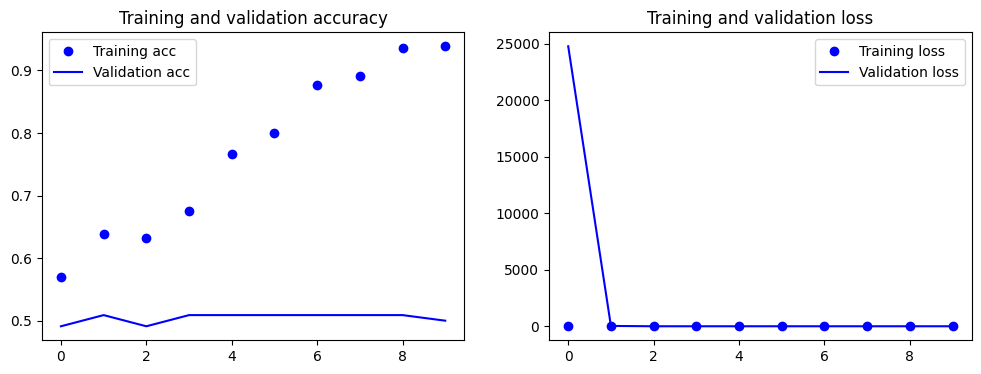

In [19]:

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [118]:

# Predictive system
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img = np.array(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    label_map = {0: 'fake', 1: 'real'}
    predicted_label = np.argmax(prediction, axis=1)[0]
    return label_map[predicted_label]

# Example usage:
image_path = 'rimage2.jpg'
prediction = predict_image(image_path)
print(f'The predicted label for the image is: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The predicted label for the image is: real


In [119]:
model.save('fake_real_cnn.h5')

In [43]:
model.save('fake_real_model.keras')
